## 2.2 迷路内をランダムに探索させる

In [16]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


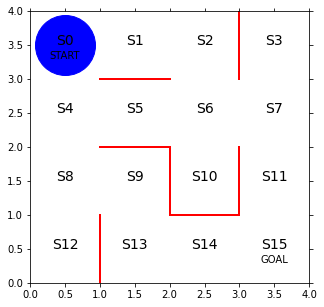

In [38]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)
plt.plot([3, 3], [3, 4], color='red', linewidth=2)
plt.plot([1, 2], [3, 3], color='red', linewidth=2)
plt.plot([3, 3], [1, 2], color='red', linewidth=2)

# 状態を示す文字S0～S12を描く
plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')
plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')
plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')
plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')
plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [3.5], marker="o", color='b', markersize=60)

In [3]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7、※s8はゴールなので、方策はなし
                    ])

In [4]:
# 方策パラメータthetaを行動方策piに変換する関数の定義


def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi


In [5]:
# 初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)


In [6]:
# 初期の方策pi_0を表示
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [7]:
# 1step移動後の状態sを求める関数を定義


def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    # pi[s,:]の確率に従って、directionが選択される

    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 1  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 3  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next


In [8]:
# 迷路内をエージェントがゴールするまで移動させる関数の定義


def goal_maze(pi):
    s = 0  # スタート地点
    state_history = [0]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        next_s = get_next_s(pi, s)
        state_history.append(next_s)  # 記録リストに次の状態（エージェントの位置）を追加

        if next_s == 8:  # ゴール地点なら終了
            break
        else:
            s = next_s

    return state_history


In [9]:
# 迷路内をゴールを目指して、移動
state_history = goal_maze(pi_0)


In [10]:
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")


[0, 3, 6, 3, 0, 3, 6, 3, 6, 3, 6, 3, 4, 3, 4, 3, 6, 3, 6, 3, 6, 3, 4, 3, 4, 3, 4, 3, 6, 3, 4, 3, 0, 3, 6, 3, 4, 3, 0, 1, 0, 1, 0, 3, 0, 1, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 5, 2, 1, 0, 3, 6, 3, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 6, 3, 6, 3, 4, 7, 4, 7, 8]
迷路を解くのにかかったステップ数は102です


In [11]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = state_history[i]  # 現在の場所を描く
    x = (state % 3) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 2.5 - int(state / 3)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())
